# 1.Data Preparation / Pre-processing

In [14]:
import pandas as pd

In [15]:
# verses = pd.read_csv('verses.csv')
# data = pd.read_csv('file1.csv', on_bad_lines='skip')
df = pd.read_csv('ayat.csv', sep='|', header=[0])
df.head(10)

,verse,context
0,1:1,"In the Name of Allah, the Merciful, the Most M..."
1,1:2,"Praise be to Allah, Lord of the Worlds,"
2,1:3,"the Merciful, the Most Merciful,"
3,1:4,Owner of the Day of Recompense.
4,1:5,You (alone) we worship; and You (alone) we rel...
5,1:6,"Guide us to the Straight Path,"
6,1:7,"the Path of those upon whom You have favored, ..."
7,2:1,AlifLaamMeem.
8,2:2,"That is the (Holy) Book, where there is no dou..."
9,2:3,Who believe in the unseen and establish the (d...


## 1.1 Remove Punctuation

In [16]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#define punctuation
punct = string.punctuation
text = "Can you use a @smiley face, 'emoji' as a : period instead?"
no_punct = ""

for char in text:
    if char not in punct:
        no_punct = no_punct + char
        
# display the unpuncted string
no_punct

'Can you use a smiley face emoji as a  period instead'

In [18]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['context_nopunc'] = df['context'].apply(lambda x: remove_punct(x))
df.head()

,verse,context,context_nopunc
0,1:1,"In the Name of Allah, the Merciful, the Most M...",In the Name of Allah the Merciful the Most Mer...
1,1:2,"Praise be to Allah, Lord of the Worlds,",Praise be to Allah Lord of the Worlds
2,1:3,"the Merciful, the Most Merciful,",the Merciful the Most Merciful
3,1:4,Owner of the Day of Recompense.,Owner of the Day of Recompense
4,1:5,You (alone) we worship; and You (alone) we rel...,You alone we worship and You alone we rely for...


## 1.2 Lowercase

In [19]:
'nlp'=='NLP'.lower()

True

In [20]:
#add lower to teh remove_punc function

#list comprhansion 
#lambda function
#adding join to join chars into words 
def remove_punct(text):
    
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['context_nopunc'] = df['context'].apply(lambda x: remove_punct(x.lower()))
df.head()

,verse,context,context_nopunc
0,1:1,"In the Name of Allah, the Merciful, the Most M...",in the name of allah the merciful the most mer...
1,1:2,"Praise be to Allah, Lord of the Worlds,",praise be to allah lord of the worlds
2,1:3,"the Merciful, the Most Merciful,",the merciful the most merciful
3,1:4,Owner of the Day of Recompense.,owner of the day of recompense
4,1:5,You (alone) we worship; and You (alone) we rel...,you alone we worship and you alone we rely for...


## 1.3 Tokenization

In [21]:
import nltk
# nltk.download('punkt')
from nltk.tokenize import word_tokenize
import re

In [22]:
text = "Can you use a smiley face emoji as a  period instead"
tokens = re.split('\W+', text)
tokens

['Can',
 'you',
 'use',
 'a',
 'smiley',
 'face',
 'emoji',
 'as',
 'a',
 'period',
 'instead']

In [23]:
def tokenize(text):
    tokens = word_tokenize(text)
    return tokens
df['context_tokenized'] = df['context_nopunc'].apply(lambda x: tokenize(x))
df.head()

,verse,context,context_nopunc,context_tokenized
0,1:1,"In the Name of Allah, the Merciful, the Most M...",in the name of allah the merciful the most mer...,"[in, the, name, of, allah, the, merciful, the,..."
1,1:2,"Praise be to Allah, Lord of the Worlds,",praise be to allah lord of the worlds,"[praise, be, to, allah, lord, of, the, worlds]"
2,1:3,"the Merciful, the Most Merciful,",the merciful the most merciful,"[the, merciful, the, most, merciful]"
3,1:4,Owner of the Day of Recompense.,owner of the day of recompense,"[owner, of, the, day, of, recompense]"
4,1:5,You (alone) we worship; and You (alone) we rel...,you alone we worship and you alone we rely for...,"[you, alone, we, worship, and, you, alone, we,..."


## 1.4 stop words

In [24]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords

In [25]:
stopwords_En = nltk.corpus.stopwords.words('english')

In [26]:
stopwords_En

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords_En]
    return text

df['context_nostop'] = df['context_tokenized'].apply(lambda x: remove_stopwords(x))
df.head()

,verse,context,context_nopunc,context_tokenized,context_nostop
0,1:1,"In the Name of Allah, the Merciful, the Most M...",in the name of allah the merciful the most mer...,"[in, the, name, of, allah, the, merciful, the,...","[name, allah, merciful, merciful]"
1,1:2,"Praise be to Allah, Lord of the Worlds,",praise be to allah lord of the worlds,"[praise, be, to, allah, lord, of, the, worlds]","[praise, allah, lord, worlds]"
2,1:3,"the Merciful, the Most Merciful,",the merciful the most merciful,"[the, merciful, the, most, merciful]","[merciful, merciful]"
3,1:4,Owner of the Day of Recompense.,owner of the day of recompense,"[owner, of, the, day, of, recompense]","[owner, day, recompense]"
4,1:5,You (alone) we worship; and You (alone) we rel...,you alone we worship and you alone we rely for...,"[you, alone, we, worship, and, you, alone, we,...","[alone, worship, alone, rely, help]"


## 1.4 Stemming

In [28]:
import nltk
ps= nltk.PorterStemmer();

In [29]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [30]:
print(ps.stem('play'))
print(ps.stem('playing'))
print(ps.stem('played'))
print(ps.stem('plays'))

play
play
play
play


In [31]:
#Over-Steming 
#Over-steaming occurs when two words are stemmed from the same root of different stems. 

print(ps.stem('universal'))
print(ps.stem('university'))
print(ps.stem('universe'))

univers
univers
univers


In [32]:
#Under-Steming
#Under-stemming occurs when two words are stemmed from the same root of not a different stems

print(ps.stem('alumnus'))
print(ps.stem('alumni'))
print(ps.stem('alumnae'))

alumnu
alumni
alumna


In [33]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

df['context_stemmed'] = df['context_nostop'].apply(lambda x: stemming(x))
df.head(10)

,verse,context,context_nopunc,context_tokenized,context_nostop,context_stemmed
0,1:1,"In the Name of Allah, the Merciful, the Most M...",in the name of allah the merciful the most mer...,"[in, the, name, of, allah, the, merciful, the,...","[name, allah, merciful, merciful]","[name, allah, merci, merci]"
1,1:2,"Praise be to Allah, Lord of the Worlds,",praise be to allah lord of the worlds,"[praise, be, to, allah, lord, of, the, worlds]","[praise, allah, lord, worlds]","[prais, allah, lord, world]"
2,1:3,"the Merciful, the Most Merciful,",the merciful the most merciful,"[the, merciful, the, most, merciful]","[merciful, merciful]","[merci, merci]"
3,1:4,Owner of the Day of Recompense.,owner of the day of recompense,"[owner, of, the, day, of, recompense]","[owner, day, recompense]","[owner, day, recompens]"
4,1:5,You (alone) we worship; and You (alone) we rel...,you alone we worship and you alone we rely for...,"[you, alone, we, worship, and, you, alone, we,...","[alone, worship, alone, rely, help]","[alon, worship, alon, reli, help]"
5,1:6,"Guide us to the Straight Path,",guide us to the straight path,"[guide, us, to, the, straight, path]","[guide, us, straight, path]","[guid, us, straight, path]"
6,1:7,"the Path of those upon whom You have favored, ...",the path of those upon whom you have favored n...,"[the, path, of, those, upon, whom, you, have, ...","[path, upon, favored, upon, anger, astray, ame...","[path, upon, favor, upon, anger, astray, amen,..."
7,2:1,AlifLaamMeem.,aliflaammeem,[aliflaammeem],[aliflaammeem],[aliflaammeem]
8,2:2,"That is the (Holy) Book, where there is no dou...",that is the holy book where there is no doubt ...,"[that, is, the, holy, book, where, there, is, ...","[holy, book, doubt, guidance, cautious, evil, ...","[holi, book, doubt, guidanc, cautiou, evil, hell]"
9,2:3,Who believe in the unseen and establish the (d...,who believe in the unseen and establish the da...,"[who, believe, in, the, unseen, and, establish...","[believe, unseen, establish, daily, prayer, sp...","[believ, unseen, establish, daili, prayer, spe..."


## 1.4 Lemmatization

In [34]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Sc\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [35]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [36]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [37]:
print(wn.lemmatize('universal'))
print(wn.lemmatize('university'))
print(wn.lemmatize('universe'))

universal
university
universe


In [38]:
print(wn.lemmatize('alumnus'))
print(wn.lemmatize('alumni'))
print(wn.lemmatize('alumnae'))

alumnus
alumnus
alumna


In [39]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

df['context_lemmatized'] = df['context_nostop'].apply(lambda x: lemmatizing(x))

df.head(10)

,verse,context,context_nopunc,context_tokenized,context_nostop,context_stemmed,context_lemmatized
0,1:1,"In the Name of Allah, the Merciful, the Most M...",in the name of allah the merciful the most mer...,"[in, the, name, of, allah, the, merciful, the,...","[name, allah, merciful, merciful]","[name, allah, merci, merci]","[name, allah, merciful, merciful]"
1,1:2,"Praise be to Allah, Lord of the Worlds,",praise be to allah lord of the worlds,"[praise, be, to, allah, lord, of, the, worlds]","[praise, allah, lord, worlds]","[prais, allah, lord, world]","[praise, allah, lord, world]"
2,1:3,"the Merciful, the Most Merciful,",the merciful the most merciful,"[the, merciful, the, most, merciful]","[merciful, merciful]","[merci, merci]","[merciful, merciful]"
3,1:4,Owner of the Day of Recompense.,owner of the day of recompense,"[owner, of, the, day, of, recompense]","[owner, day, recompense]","[owner, day, recompens]","[owner, day, recompense]"
4,1:5,You (alone) we worship; and You (alone) we rel...,you alone we worship and you alone we rely for...,"[you, alone, we, worship, and, you, alone, we,...","[alone, worship, alone, rely, help]","[alon, worship, alon, reli, help]","[alone, worship, alone, rely, help]"
5,1:6,"Guide us to the Straight Path,",guide us to the straight path,"[guide, us, to, the, straight, path]","[guide, us, straight, path]","[guid, us, straight, path]","[guide, u, straight, path]"
6,1:7,"the Path of those upon whom You have favored, ...",the path of those upon whom you have favored n...,"[the, path, of, those, upon, whom, you, have, ...","[path, upon, favored, upon, anger, astray, ame...","[path, upon, favor, upon, anger, astray, amen,...","[path, upon, favored, upon, anger, astray, ame..."
7,2:1,AlifLaamMeem.,aliflaammeem,[aliflaammeem],[aliflaammeem],[aliflaammeem],[aliflaammeem]
8,2:2,"That is the (Holy) Book, where there is no dou...",that is the holy book where there is no doubt ...,"[that, is, the, holy, book, where, there, is, ...","[holy, book, doubt, guidance, cautious, evil, ...","[holi, book, doubt, guidanc, cautiou, evil, hell]","[holy, book, doubt, guidance, cautious, evil, ..."
9,2:3,Who believe in the unseen and establish the (d...,who believe in the unseen and establish the da...,"[who, believe, in, the, unseen, and, establish...","[believe, unseen, establish, daily, prayer, sp...","[believ, unseen, establish, daili, prayer, spe...","[believe, unseen, establish, daily, prayer, sp..."


# II-Text Laws

## Zipf's Law

In [54]:
def terms_frequency (list):
    dictionary={}      # store terms in a dictionary (key,value)
    counted_list=[]      # fill in this list with words that are already counted
    for term in list:
        if term not in counted_list:
            freq=list.count(term)
            dictionary[term]=freq
            counted_list.append(term)

    return sorted(dictionary.items(), key=lambda x:x[1], reverse=True)

In [48]:
list = []
for i in range(len(df)):
    list += df['context_stemmed'][i]
terms_freq = terms_frequency(list)
terms_freq

[('allah', 2738),
 ('shall', 1281),
 ('lord', 967),
 ('say', 858),
 ('believ', 761),
 ('said', 614),
 ('day', 513),
 ('know', 451),
 ('us', 439),
 ('punish', 387),
 ('inde', 380),
 ('earth', 378),
 ('upon', 370),
 ('peopl', 368),
 ('except', 367),
 ('messeng', 365),
 ('sure', 354),
 ('nation', 345),
 ('merci', 333),
 ('would', 331),
 ('sent', 322),
 ('come', 314),
 ('one', 311),
 ('good', 283),
 ('worship', 275),
 ('heaven', 275),
 ('fear', 274),
 ('turn', 274),
 ('guid', 270),
 ('unbeliev', 269),
 ('among', 265),
 ('book', 256),
 ('see', 256),
 ('give', 250),
 ('forgiv', 238),
 ('evil', 236),
 ('made', 234),
 ('life', 232),
 ('sign', 228),
 ('let', 224),
 ('truth', 222),
 ('thing', 217),
 ('given', 213),
 ('disbeliev', 206),
 ('creat', 204),
 ('clear', 204),
 ('beli', 201),
 ('vers', 197),
 ('prophet', 193),
 ('away', 193),
 ('ask', 191),
 ('order', 189),
 ('yet', 189),
 ('call', 187),
 ('make', 186),
 ('take', 173),
 ('follow', 170),
 ('knowledg', 169),
 ('bring', 167),
 ('mose', 166

In [44]:
print(str(len(df))+" ayah")

6235 ayah


In [56]:
# top 10 words
# Determines how many times each word appears in the file. 
from collections import Counter
word_and_freq = Counter(list)
top_ten_words = word_and_freq.most_common(10)

print(top_ten_words) 

[('allah', 2738), ('shall', 1281), ('lord', 967), ('say', 858), ('believ', 761), ('said', 614), ('day', 513), ('know', 451), ('us', 439), ('punish', 387)]


In [59]:
# function calculating zip's law for each word
def zipf_frequency(most_common_count, n=10):
    zipf_law = []
    for x in range(1, n+1):
        zipf_law.append(most_common_count/(x))
    return zipf_law

# dataframe = top_ten_words vs actual_count
top_ten_words_df = pd.DataFrame(top_ten_words, columns=['word', 'actual count'])
top_ten_words_df['expected zipf frequency'] = zipf_frequency(top_ten_words_df.loc[0, 'actual count'])
top_ten_words_df

,word,actual count,expected zipf frequency
0,allah,2738,2738.000000
1,shall,1281,1369.000000
2,lord,967,912.666667
3,say,858,684.500000
4,believ,761,547.600000
5,said,614,456.333333
6,day,513,391.142857
7,know,451,342.250000
8,us,439,304.222222
9,punish,387,273.800000


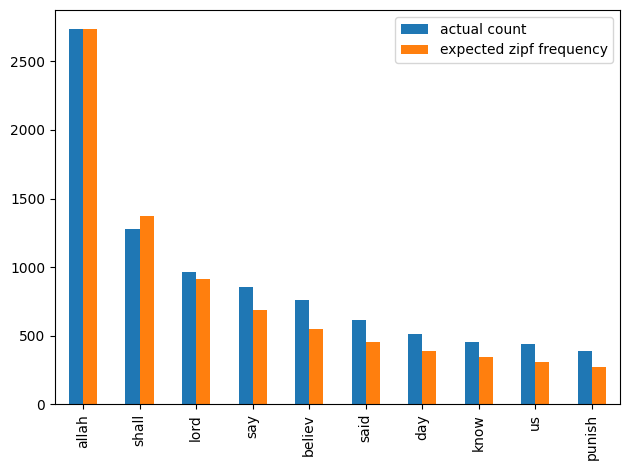

In [61]:
# visualization of zip's law
fig, ax = plt.subplots()
top_ten_words_df.plot(kind='bar', ax=ax)
ax.set_xticklabels(top_ten_words_df['word'])
fig.tight_layout()

## Beford's law

## Heap's law

## Create function to remove punctuation, tokenize, remove stopwords, and stem

In [62]:
### Create function to remove punctuation, tokenize, remove stopwords, and stem

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
     #tokens = re.split('\W+', text)
    tokens = word_tokenize(text)
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords_En])
    return text
df=df[['verse','context']]
df['cleaned_text'] = df['context'].apply(lambda x: clean_text(x))
df.head(10)

,verse,context,cleaned_text
0,1:1,"In the Name of Allah, the Merciful, the Most M...",name allah merci merci
1,1:2,"Praise be to Allah, Lord of the Worlds,",prais allah lord world
2,1:3,"the Merciful, the Most Merciful,",merci merci
3,1:4,Owner of the Day of Recompense.,owner day recompens
4,1:5,You (alone) we worship; and You (alone) we rel...,alon worship alon reli help
5,1:6,"Guide us to the Straight Path,",guid us straight path
6,1:7,"the Path of those upon whom You have favored, ...",path upon favor upon anger astray amen pleas a...
7,2:1,AlifLaamMeem.,aliflaammeem
8,2:2,"That is the (Holy) Book, where there is no dou...",holi book doubt guidanc cautiou evil hell
9,2:3,Who believe in the unseen and establish the (d...,believ unseen establish daili prayer spend provid


## 2. Vectorizing text data

In [63]:
sentences = ["good movie", "not a good movie", "did not like", "i like it"]

### 2.1: Count vectorization

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
features_cv = vectorizer.fit_transform(sentences)  #Sparse Matrix
print(features_cv.shape)
print('Sparse Matrix :\n', features_cv)

features_cv = pd.DataFrame(features_cv.toarray())
features_cv.columns = vectorizer.get_feature_names()
features_cv

(4, 6)
Sparse Matrix :
   (0, 1)	1
  (0, 4)	1
  (1, 1)	1
  (1, 4)	1
  (1, 5)	1
  (2, 5)	1
  (2, 0)	1
  (2, 3)	1
  (3, 3)	1
  (3, 2)	1


C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,did,good,it,like,movie,not
0,0,1,0,0,1,0
1,0,1,0,0,1,1
2,1,0,0,1,0,1
3,0,0,1,1,0,0


In [67]:
from sklearn.feature_extraction.text import CountVectorizer

# To create a Count Vectorizer, we simply need to instantiate one.
# There are special parameters we can set here when making the vectorizer, but
# for the most basic example, it is not needed.


vectorizer = CountVectorizer()
features_CountVec = vectorizer.fit_transform(df['cleaned_text'])  #Sparse_Matrix
print(features_CountVec.shape)
print('Sparse_Matrix :\n', features_CountVec)

# كان----- sparce matrice------ حولناها ل ماتريس عادىة----
features_CountVec = pd.DataFrame(features_CountVec.toarray())
features_CountVec.columns = vectorizer.get_feature_names()
features_CountVec

(6235, 3555)
Sparse_Matrix :
   (0, 1955)	1
  (0, 100)	1
  (0, 1857)	2
  (1, 100)	1
  (1, 2237)	1
  (1, 1765)	1
  (1, 3501)	1
  (2, 1857)	2
  (3, 2105)	1
  (3, 709)	1
  (3, 2384)	1
  (4, 114)	2
  (4, 3507)	1
  (4, 2412)	1
  (4, 1420)	1
  (5, 1353)	1
  (5, 3307)	1
  (5, 2880)	1
  (5, 2143)	1
  (6, 2143)	1
  (6, 3297)	2
  (6, 1101)	1
  (6, 150)	1
  (6, 229)	1
  (6, 127)	1
  :	:
  (6226, 700)	1
  (6226, 1272)	1
  (6227, 1025)	1
  (6227, 1659)	1
  (6227, 371)	1
  (6228, 1025)	1
  (6228, 998)	1
  (6228, 999)	1
  (6229, 1765)	1
  (6229, 2162)	1
  (6229, 2577)	1
  (6229, 2988)	1
  (6229, 2398)	1
  (6230, 2162)	1
  (6230, 1650)	1
  (6231, 2162)	1
  (6231, 1300)	1
  (6232, 1025)	1
  (6232, 3444)	1
  (6232, 2741)	1
  (6233, 2162)	1
  (6233, 488)	1
  (6233, 3444)	1
  (6234, 2162)	1
  (6234, 1619)	1


C:\Users\Sc\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aad,aaron,abandon,abas,abat,abid,abil,abilahab,abject,abl,...,yourwit,youshal,youth,youther,zabania,zachariah,zakat,zakkum,zayd,zealous
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6230,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6231,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6233,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4.2.2: Vectorizing Data: N-Grams

In [1]:
# ngram = term -> 2terms -> 3terms
ngram_vect = CountVectorizer(ngram_range=(1,3))
features_ngram = ngram_vect.fit_transform(df['cleaned_text'])

print(features_ngram.shape)
print('Sparse Matrix :\n', features_ngram)

features_ngram = pd.DataFrame(features_ngram.toarray())
features_ngram.columns = ngram_vect.get_feature_names()
features_ngram.head(5)

NameError: name 'CountVectorizer' is not defined

In [ ]:
# الفرق بيناتهم انك تحسب الوزن تاع الكلمة و ليس عدد التكررا فقط
#  w = TF * IDF

### 4.2.3: Vectorizing Raw Data: TF-IDF

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

#tfidf = TfidfVectorizer(min_df=1)
tfidf = TfidfVectorizer( ngram_range=(2,2))
features_tfidf = tfidf.fit_transform(df['cleaned_text'])

print(features_tfidf.shape)
print('Sparse Matrix :\n', features_tfidf)

features_tfidf = pd.DataFrame(features_tfidf.toarray())
features_tfidf.columns = tfidf.get_feature_names()
features_tfidf.head(20)

(6235, 32188)
Sparse Matrix :
   (0, 17037)	0.5975050070258352
  (0, 820)	0.5670043062354362
  (0, 17947)	0.5670043062354362
  (1, 16070)	0.5420169523330977
  (1, 805)	0.5320414786445983
  (1, 20614)	0.6504994145925191
  (2, 17037)	1.0
  (3, 6210)	0.6174070218606394
  (3, 19413)	0.7866438643739463
  (4, 22093)	0.5
  (4, 1144)	0.5
  (4, 31570)	0.5
  (4, 1153)	0.5
  (5, 26439)	0.4608587449442054
  (5, 29699)	0.67729172977712
  (5, 11920)	0.5734850738981516
  (6, 20402)	0.36144378738706734
  (6, 1265)	0.36144378738706734
  (6, 2193)	0.36144378738706734
  (6, 1555)	0.36144378738706734
  (6, 29281)	0.36144378738706734
  (6, 9562)	0.31138231222891605
  (6, 29340)	0.34524105634574903
  (6, 19730)	0.36144378738706734
  (8, 8655)	0.41968995006193127
  :	:
  (6222, 3478)	0.7231291425310082
  (6222, 11157)	0.6907128514964586
  (6223, 18595)	1.0
  (6224, 15799)	0.5573055456234687
  (6224, 21995)	0.5008481773850956
  (6224, 27138)	0.4718888448865294
  (6224, 23797)	0.4646316283885684
  (6225, 8628)

MemoryError: Unable to allocate 1.50 GiB for an array with shape (6235, 32188) and data type float64